In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)
sqlcontext=SQLContext(sc)

In [2]:
df=spark.read.csv("df.csv",header=True,inferSchema=True)
df.show()

+---+------+---------+
|Age|Salary|Purchased|
+---+------+---------+
| 59| 88000|        0|
| 35| 61000|        1|
| 37| 70000|        0|
| 52| 21000|        0|
| 48|141000|        1|
| 37| 93000|        0|
| 37| 62000|        1|
| 48|138000|        0|
| 41| 79000|        1|
| 37| 78000|        0|
| 39|134000|        0|
| 49| 89000|        0|
| 55| 39000|        0|
| 37| 77000|        1|
| 35| 57000|        1|
| 36| 63000|        1|
| 42| 73000|        0|
+---+------+---------+



In [3]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- Purchased: integer (nullable = true)



In [4]:
mean_age_0=df.filter(df["Purchased"]==0).groupBy("Purchased").agg({"Age":"mean"}).collect()[0][1]
var_age_0=df.filter(df["Purchased"]==0).groupBy("Purchased").agg({"Age":"variance"}).collect()[0][1]
mean_age_0,var_age_0

(45.5, 67.16666666666667)

In [5]:
mean_age_1=df.filter(df["Purchased"]==1).groupBy("Purchased").agg({"Age":"mean"}).collect()[0][1]
var_age_1=df.filter(df["Purchased"]==1).groupBy("Purchased").agg({"Age":"variance"}).collect()[0][1]
mean_age_1,var_age_1

(38.42857142857143, 21.952380952380953)

In [6]:
mean_salary_0=df.filter(df["Purchased"]==0).groupBy("Purchased").agg({"Salary":"mean"}).collect()[0][1]
var_salary_0=df.filter(df["Purchased"]==0).groupBy("Purchased").agg({"Salary":"variance"}).collect()[0][1]
mean_salary_0,var_salary_0

(82300.0, 1317344444.4444444)

In [7]:
mean_salary_1=df.filter(df["Purchased"]==1).groupBy("Purchased").agg({"Salary":"mean"}).collect()[0][1]
var_salary_1=df.filter(df["Purchased"]==1).groupBy("Purchased").agg({"Salary":"variance"}).collect()[0][1]
mean_salary_1,var_salary_1

(77142.85714285714, 862809523.8095237)

In [8]:
sizeDf=df.count()
sizeDf

17

In [9]:
nos_1=df.filter(df["Purchased"]==1).count()
nos_1

7

In [10]:
nos_0=df.filter(df["Purchased"]==0).count()
nos_0

10

In [11]:
p_n=nos_0/sizeDf
p_y=nos_1/sizeDf
p_n,p_y

(0.5882352941176471, 0.4117647058823529)

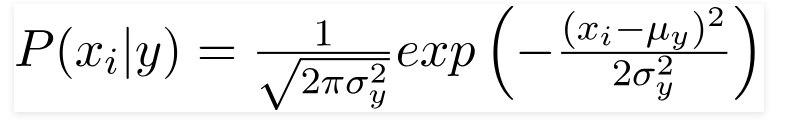

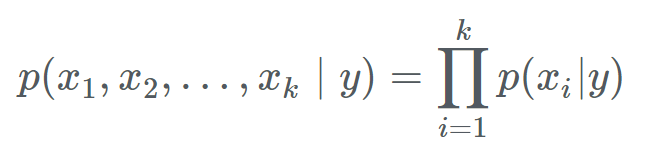

# x represents the independent feature columns and y is the hypothesis class 

In [12]:
import math

In [13]:
p_x1_yes=(1/math.sqrt(2*math.pi*var_age_1))*math.exp(-0.5*((38-mean_age_1)**2)/var_age_1)
p_x1_yes

0.08479151603350477

In [14]:
p_x1_no=(1/math.sqrt(2*math.pi*var_age_0))*math.exp(-0.5*((38-mean_age_0)**2)/var_age_0)
p_x1_no


0.03202425896032866

In [15]:
p_x2_yes=(1/math.sqrt(2*math.pi*var_salary_1))*math.exp(-0.5*((71000-mean_salary_1)**2)/var_salary_1)
p_x2_yes


1.3287881202425882e-05

In [16]:
p_x2_no=(1/math.sqrt(2*math.pi*var_salary_0))*math.exp(-0.5*((71000-mean_salary_0)**2)/var_salary_0)
p_x2_no


1.0471583113637713e-05

In [17]:
p_x_yes=p_x1_yes*p_x2_yes
p_x_yes

1.1266995920268007e-06

In [18]:
p_x_no=p_x2_no*p_x1_no
p_x_no

3.353446893557388e-07

In [19]:
p_x_yes_normalized=p_x_yes/(p_x_yes+p_x_no)
p_x_yes_normalized

0.7706330145906184

In [20]:
p_x_no_normalized=p_x_no/(p_x_yes+p_x_no)
p_x_no_normalized

0.22936698540938164

In [21]:
total_prob=p_x_yes_normalized+p_x_no_normalized
total_prob

1.0